# Clustering of students based on their marks , using different clustering methods and comparing between them

# Problem Statement:-

Apply the specified unsupervised ML algorithms on the given dataset
1. K Means Clustering 
2. Hierarchical clustering
3. DBSCAN

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("StudentsPerformance.csv")
df.rename(index = int, columns = {"race/ethnicity":"ethnicity"},inplace=True)
df

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


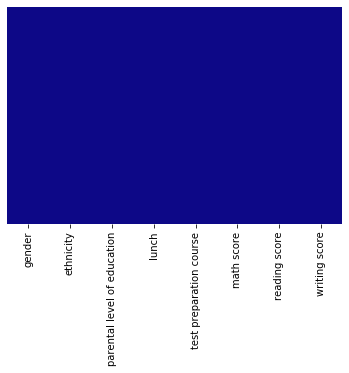

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [50]:
df

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [51]:
scores = df.loc[:,["math score","reading score","writing score"]]
scores.rename(index = int, columns = {"math score":"mthscore","reading score":"readscr","writing score":"writingscr"},inplace=True)

# K Means Clustering

In [52]:
from sklearn.cluster import KMeans
wcss = []

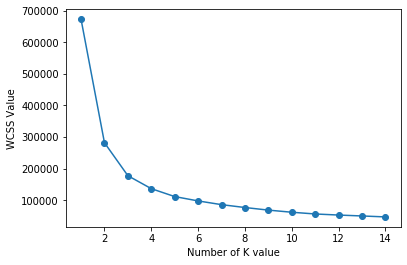

In [53]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

In [54]:
kmeans2 = KMeans(n_clusters = 4)
clusters = kmeans2.fit_predict(scores)
scores["examscores"] = clusters


In [55]:
clusters

array([2, 0, 0, 1, 2, 2, 0, 1, 3, 1, 3, 1, 2, 2, 3, 2, 0, 1, 1, 3, 3, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 3, 1, 2, 1, 3, 2, 3, 3,
       1, 2, 3, 3, 3, 3, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       3, 0, 2, 1, 2, 1, 0, 0, 3, 2, 3, 3, 2, 2, 0, 1, 0, 3, 0, 3, 3, 2,
       0, 3, 1, 3, 0, 2, 0, 2, 3, 3, 0, 0, 0, 3, 2, 0, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 1, 2, 1, 0, 2, 2, 0, 3, 2, 3, 1,
       3, 0, 2, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0,
       3, 2, 3, 0, 2, 3, 1, 2, 1, 3, 2, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 3,
       1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 1, 3, 3, 0, 0, 0, 1, 2, 3,
       3, 0, 3, 0, 3, 1, 2, 3, 2, 0, 2, 1, 2, 0, 0, 2, 3, 3, 1, 0, 2, 0,
       3, 1, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 2, 0, 2, 3, 1, 3, 2, 0, 2, 0, 3, 2, 3, 1, 1, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1, 2, 1, 0, 2,

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(scores)
pca_2d = pca.transform(scores)
pca_2d

array([[ -8.48258513,   1.26226966],
       [-25.48866787, -13.72556831],
       [-43.14624165,  -0.35553927],
       ...,
       [  4.77626564,  -5.16094262],
       [-11.46021504,  -5.4798991 ],
       [-26.50392625,  -4.82782807]])

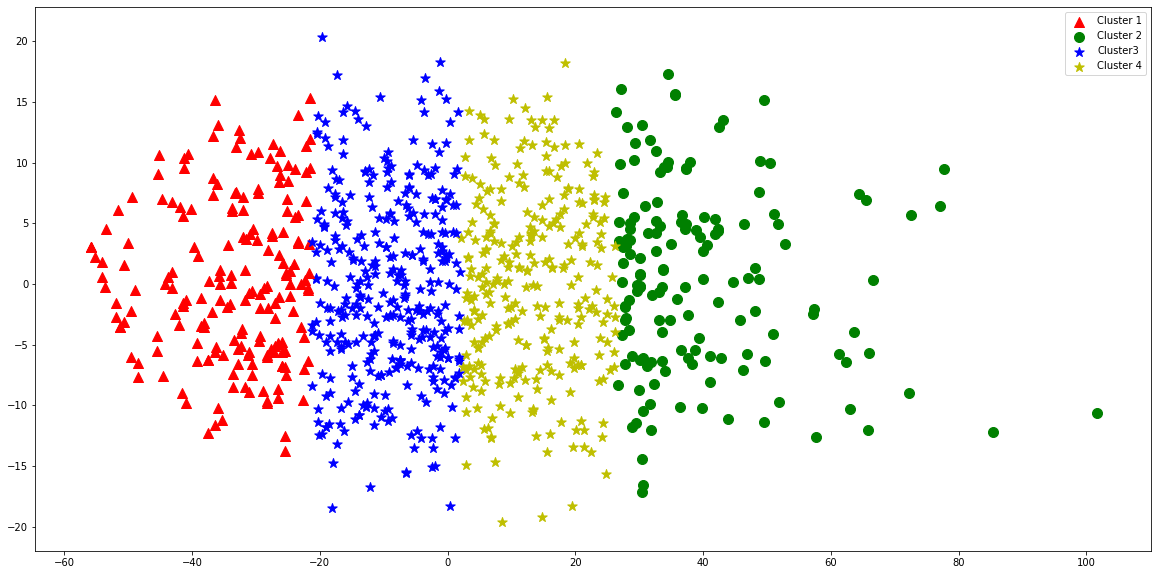

In [57]:
import matplotlib.pyplot as pl
pl.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if clusters[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif clusters[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif clusters[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='*')
    elif clusters[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='y',marker='*')
pl.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2','Cluster3','Cluster 4'])

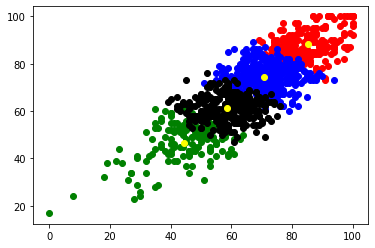

In [58]:
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()

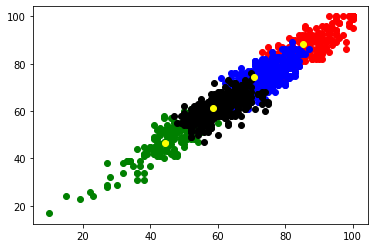

In [61]:
plt.scatter(scores.writingscr[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.writingscr[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.writingscr[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.writingscr[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.writingscr[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()

In [62]:
np.unique(kmeans2.labels_)

array([0, 1, 2, 3])

# Hierarchical clustering

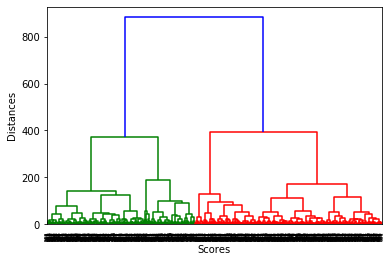

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Distances")
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
clusters = hc.fit_predict(scores)
cluster=clusters

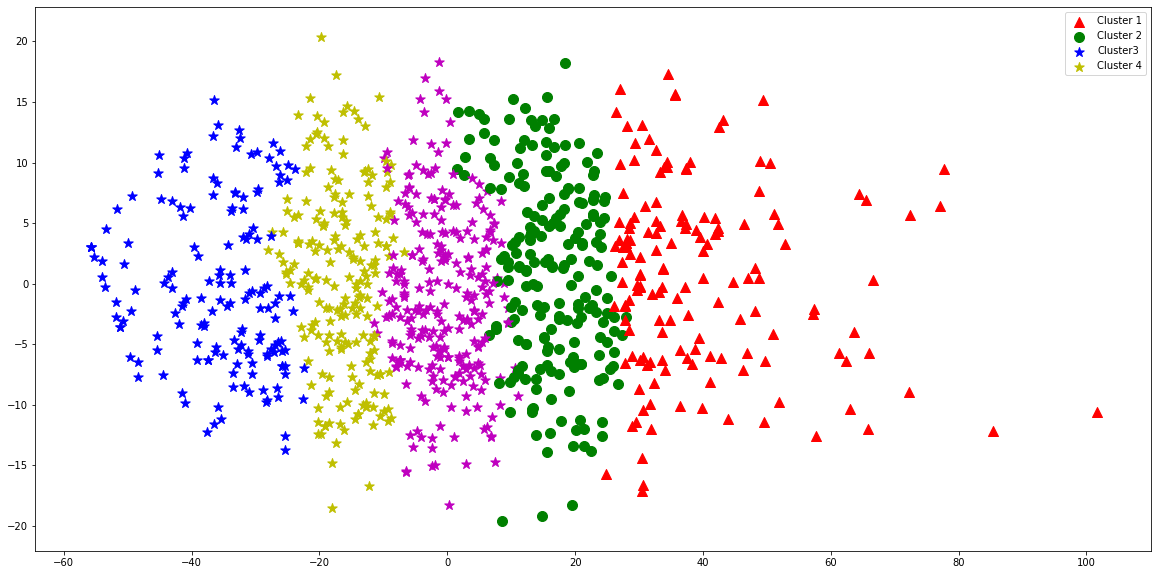

In [35]:
import matplotlib.pyplot as pl
pl.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if clusters[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif clusters[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif clusters[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='*')
    elif clusters[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='y',marker='*')
    elif clusters[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='m',marker='*')
pl.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2','Cluster3','Cluster 4'])

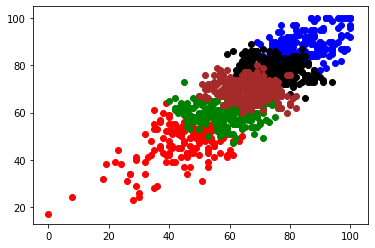

In [36]:
scores["examscores"] = cluster
plt.scatter(scores.writingscr[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.writingscr[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.writingscr[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.writingscr[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.writingscr[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.show()

In [ ]:
plt.scatter(scores.readscr[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.readscr[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.readscr[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.readscr[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.readscr[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.show()

In [8]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(scores)
distances, indices = nbrs.kneighbors(scores)

NameError: name 'scores' is not defined

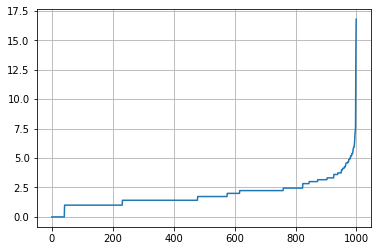

In [38]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.grid()

# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4, metric='euclidean', min_samples=8)

In [42]:
scores["examscores"]=dbscan.fit_predict(scores)
clusters=scores["examscores"]

In [43]:
scores["examscores"].value_counts()

 0    773
-1    198
 1     16
 2     13
Name: examscores, dtype: int64

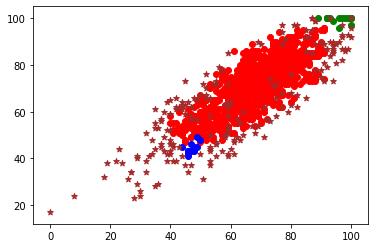

In [44]:
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black")
plt.scatter(scores.mthscore[scores.examscores == -1],scores.readscr[scores.examscores == -1],color="brown",marker='*')
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="yellow")
plt.scatter(scores.mthscore[scores.examscores == 5],scores.readscr[scores.examscores == 5],color="purple")
plt.scatter(scores.mthscore[scores.examscores == 6],scores.readscr[scores.examscores == 6],color="darkblue")
plt.show()

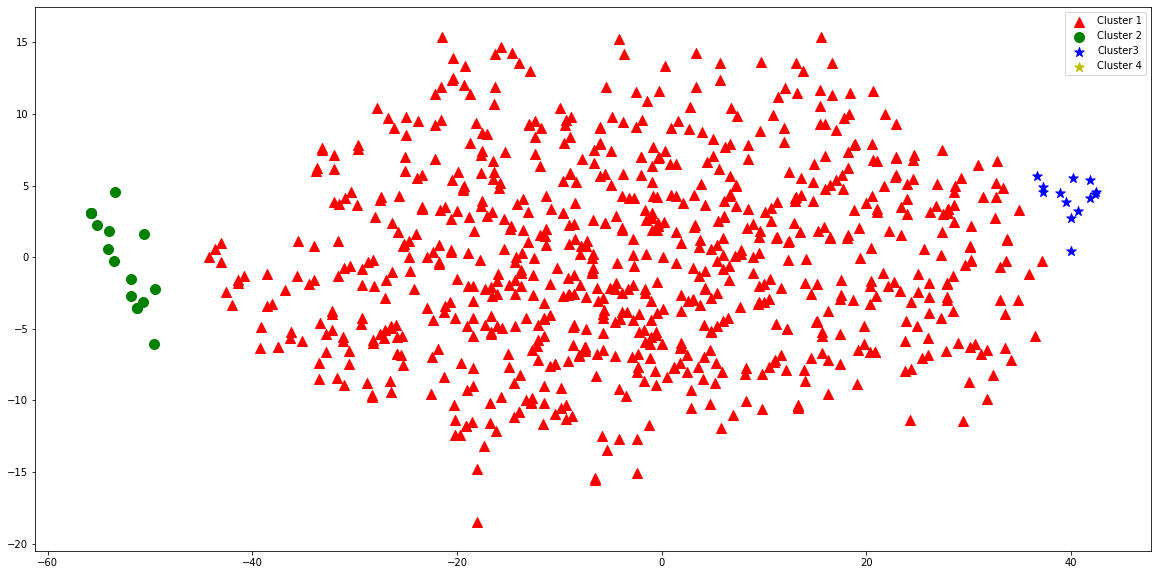

In [46]:
import matplotlib.pyplot as pl
pl.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if clusters[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif clusters[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif clusters[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='*')
    elif clusters[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='y',marker='*')
    elif clusters[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='m',marker='*')
pl.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2','Cluster3','Cluster 4'])
    